In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.jet()

<Figure size 640x480 with 0 Axes>

In [57]:
data = np.load("../Data/m1testcell/print-through/outer.pkl",allow_pickle=True)
nodex = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s = np.asarray(data["field"])

In [59]:
np.asarray(data["nodes"]).reshape(-1,2).T.shape, np.asarray(data["field"]).shape

((2, 27685), (27685,))

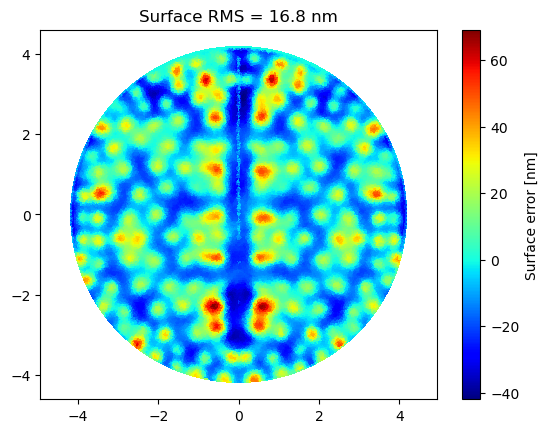

In [47]:
plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
plt.colorbar(label="Surface error [nm]")
plt.title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
plt.axis('equal');

(-4.599063954, 4.599069034, -4.599119326, 4.599114246)

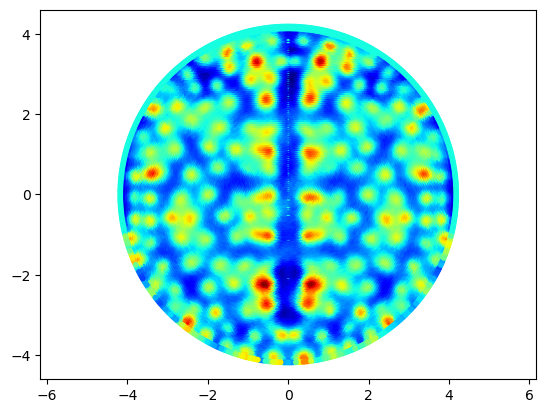

In [48]:
plt.scatter(nodex, nodey, 10, c=s)
plt.axis('equal')

## the zoom-ins below explain why the triangulation plot look different from the scatter

(2.0, 4.0)

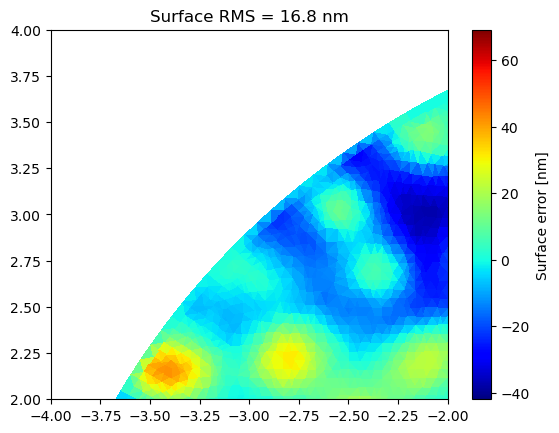

In [42]:
plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
plt.colorbar(label="Surface error [nm]")
plt.title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
plt.xlim([-4,-2])
plt.ylim([2, 4])
#plt.axis('equal');

(2.0, 4.0)

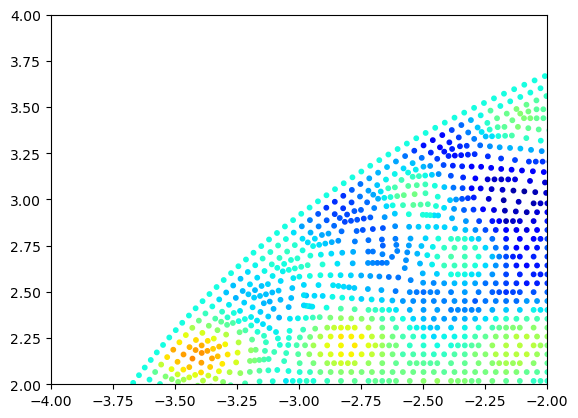

In [41]:
plt.scatter(nodex, nodey, 10, c=s)
plt.xlim([-4,-2])
plt.ylim([2, 4])
#plt.axis('equal')

## nozzle influence functions

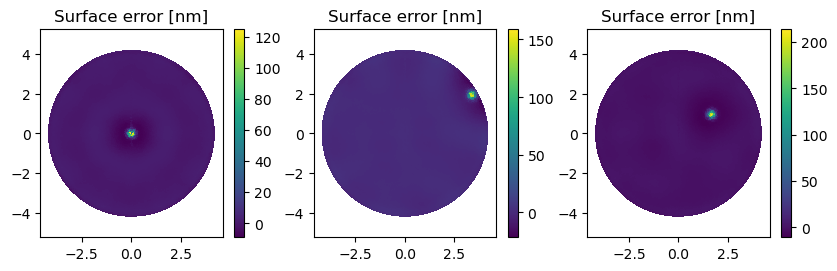

In [24]:
fig, ax = plt.subplots(1,3, figsize=(10,2.7))

data = np.load("../Data/m1testcell/nozzles/center/outer.pkl",allow_pickle=True)
img = ax[0].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[0])
ax[0].set_title('Surface error [nm]')
ax[0].axis('equal');

data = np.load("../Thermal/m1testcell/nozzles/edge/outer.pkl",allow_pickle=True)
img = ax[1].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Surface error [nm]')
ax[1].axis('equal');

data = np.load("../Thermal/m1testcell/nozzles/mid/outer.pkl",allow_pickle=True)
img = ax[2].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[2])
ax[2].set_title('Surface error [nm]')
ax[2].axis('equal');

(-0.3, 0.3)

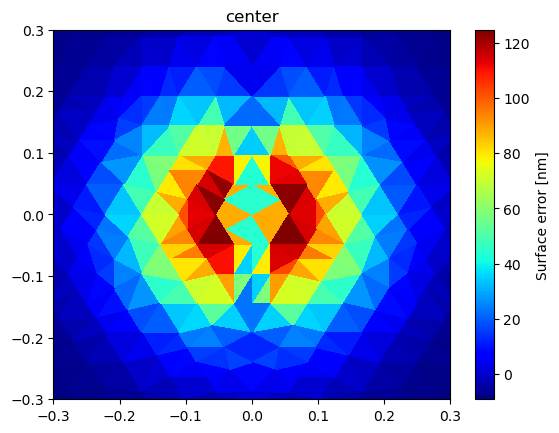

In [44]:
data = np.load("../Data/m1testcell/nozzles/center/outer.pkl",allow_pickle=True)
plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
plt.colorbar(label="Surface error [nm]")
plt.title('center')
plt.xlim([-.3,.3])
plt.ylim([-.3, .3])
#plt.axis('equal');

## Disabled actuators

In [7]:
mat1 = scipy.io.loadmat('../Data/m1testcell/cold-spot_single/tcell_nosa_dTn.mat')
mat2 = scipy.io.loadmat('../Data/m1testcell/cold-spot_triple/tcell_nota_dTn.mat')

In [10]:
mat1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Oct 26 09:06:11 2023',
 '__version__': '1.0',
 '__globals__': [],
 'dtmt': array([[-0.05960529],
        [ 0.18648872],
        [-0.06445088],
        ...,
        [-0.01653977],
        [-0.02278333],
        [-0.05591302]]),
 'xn': array([[-1.331705],
        [ 3.495566],
        [-1.664428],
        ...,
        [-1.331273],
        [ 2.496773],
        [ 1.878254]]),
 'yn': array([[ 1.921430e-01],
        [-6.725960e-01],
        [ 1.850000e-04],
        ...,
        [-2.883114e+00],
        [ 2.210319e+00],
        [-3.625519e+00]])}

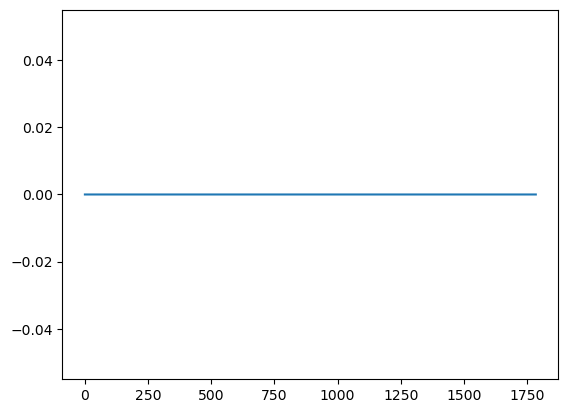

In [9]:
plt.plot(mat1['xn']-mat2['xn'])

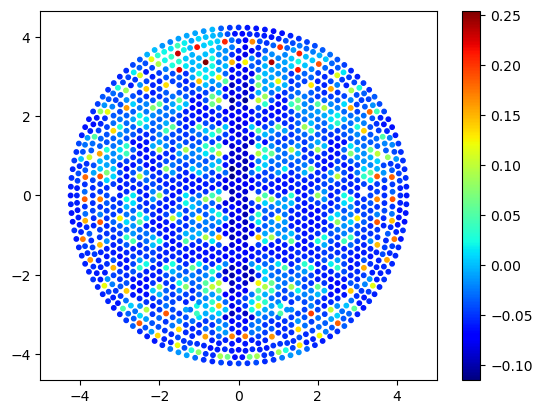

In [17]:
plt.scatter(mat1['xn'], mat2['yn'], 10, mat2['dtmt'])
plt.axis('equal')
plt.colorbar()

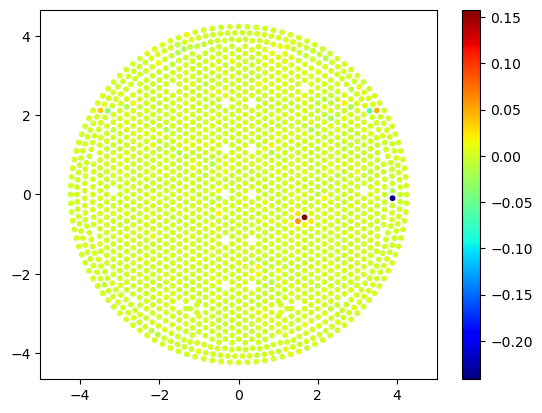

In [15]:
plt.scatter(mat1['xn'], mat2['yn'], 10, mat1['dtmt']-mat2['dtmt'])
plt.axis('equal')
plt.colorbar()